## Support Vector Machine
### 1. Toy examples을 통해 각 SVM margin 시각화
   #### Linear SVM
    * Soft margin
    * Hard margin
   #### Nonlinear SVM (kernel functions)
    * soft margin - polynomial kernel
    - Hard margin - Sigmoid kernel
                  - Gaussian kernel
   #### Binary classification, Multi-class classification
### 2. SVM 모델 구축
   #### K-fold cross validation 활용
### 3. 예측 결과 평가

In [14]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터셋
from sklearn.datasets import load_breast_cancer, load_iris, make_moons

import os

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from tqdm import tqdm

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

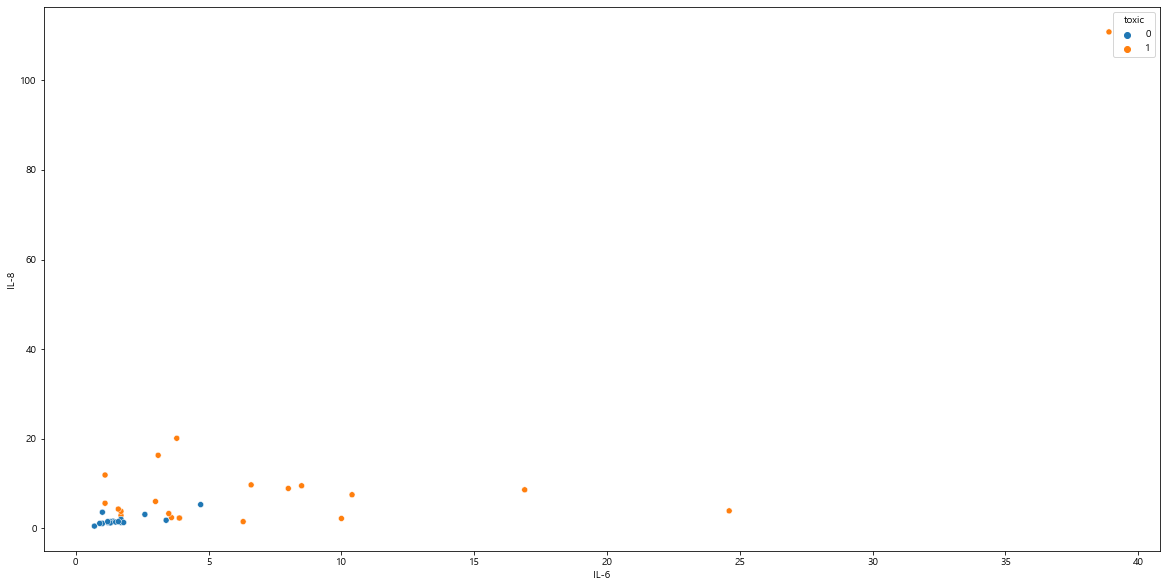

In [3]:
hptc1 = pd.read_csv('HPTC1.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

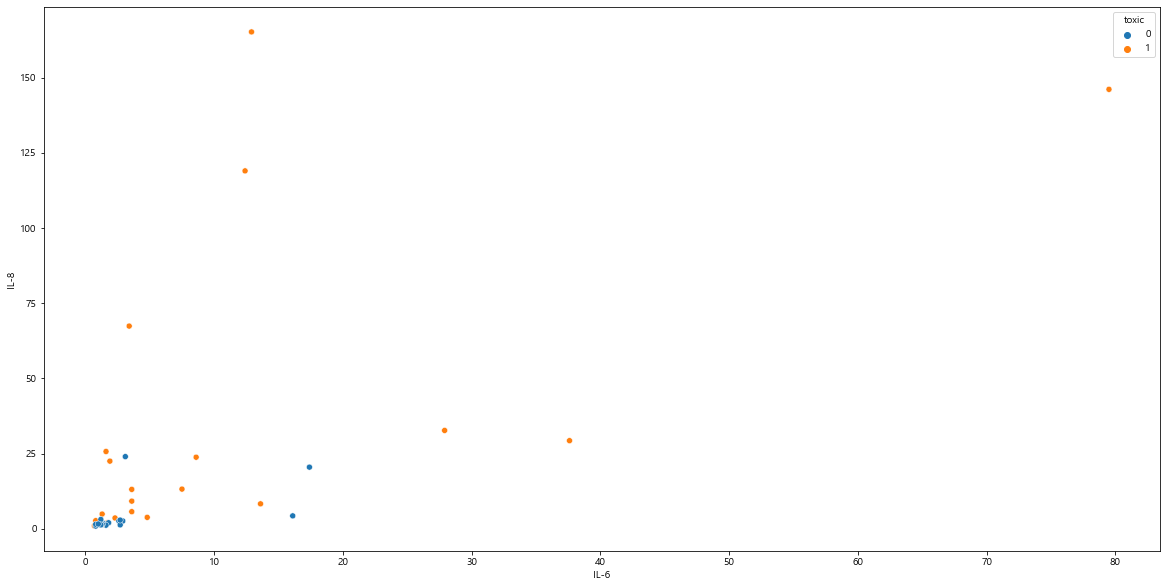

In [4]:
hptc2 = pd.read_csv('HPTC2.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc2, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

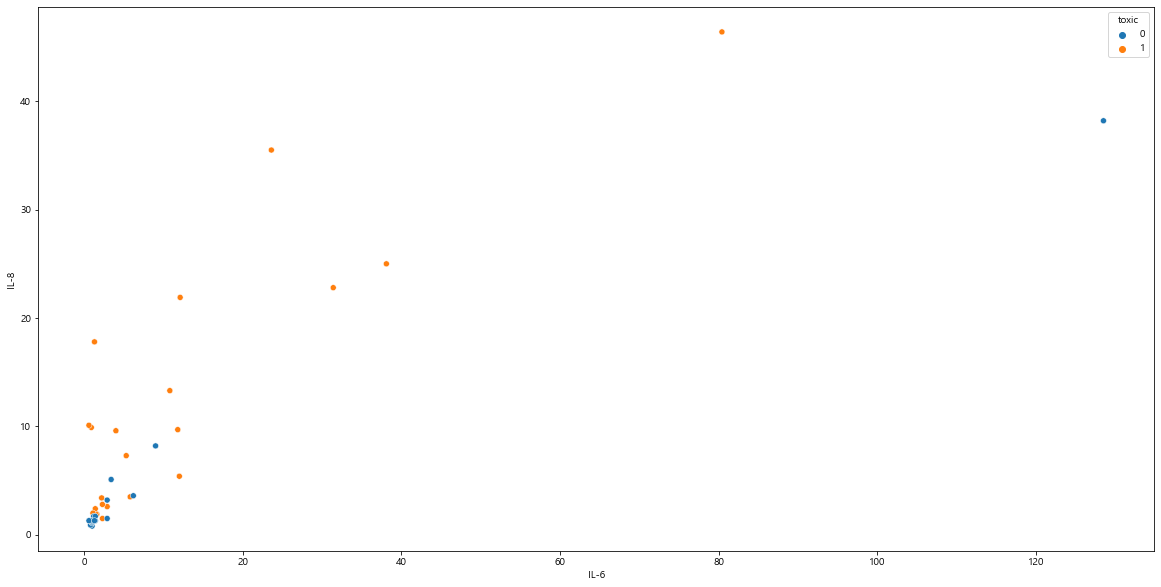

In [5]:
hptc3 = pd.read_csv('HPTC3.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc3, x = 'IL-6',y='IL-8',hue='toxic')

In [6]:
X1 = pd.DataFrame(hptc1, columns=['IL-6','IL-8']).to_numpy()
y1 = pd.DataFrame(hptc1, columns=['toxic']).to_numpy()
X2 = pd.DataFrame(hptc2, columns=['IL-6','IL-8']).to_numpy()
y2 = pd.DataFrame(hptc2, columns=['toxic']).to_numpy()
X3 = pd.DataFrame(hptc3, columns=['IL-6','IL-8']).to_numpy()
y3 = pd.DataFrame(hptc3, columns=['toxic']).to_numpy()

###  Linear SVM for linearly separable cases with hard margin (Large C)

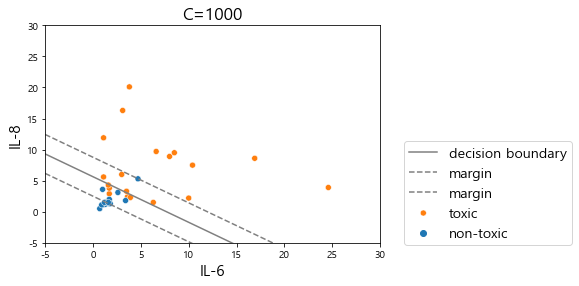

In [7]:
# Linear hard

C = 1000
svc = LinearSVC(C=C,loss="hinge")
svc.fit(X1,y1)

# 파라미터 (W,b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-5,30,num=100)
# 결정 경계(decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.plot(x0,x1_decision,color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey',linestyle='--')
plt.legend(['decision boundary','margin','margin','toxic','non-toxic'], fontsize=14,bbox_to_anchor=(1.05,0.5))
plt.xlabel('IL-6', fontsize=15)
plt.ylabel('IL-8', fontsize=15)
plt.ylim(-5,30)
plt.xlim(-5,30)
plt.title(f'C={C}', fontsize=17)
plt.show()

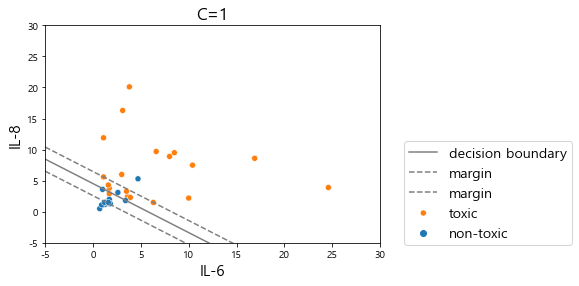

In [20]:
# Linear soft

C = 1
svc = LinearSVC(C=C,loss="hinge")
svc.fit(X1,y1)

# 파라미터 (W,b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-5,30,num=100)
# 결정 경계(decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.plot(x0,x1_decision,color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey',linestyle='--')
plt.legend(['decision boundary','margin','margin','toxic','non-toxic'], fontsize=14,bbox_to_anchor=(1.05,0.5))
plt.xlabel('IL-6', fontsize=15)
plt.ylabel('IL-8', fontsize=15)
plt.ylim(-5,30)
plt.xlim(-5,30)
plt.title(f'C={C}', fontsize=17)
plt.show()

#### Linear SVM for linearly nonseparable cases with hard margin (Large C)

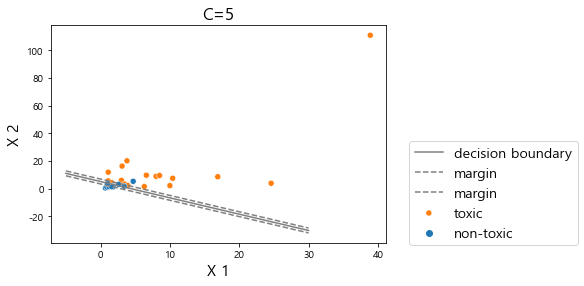

In [9]:
# Linear Hard

C = 5
svc = LinearSVC(C=C,loss="hinge")
svc.fit(X1,y1)

# 파라미터 (W,b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-5,30,num=100)
# 결정 경계(decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.plot(x0,x1_decision,color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey',linestyle='--')
plt.legend(['decision boundary','margin','margin','toxic','non-toxic'], fontsize=14,bbox_to_anchor=(1.05,0.5))
plt.xlabel('X 1', fontsize=15)
plt.ylabel('X 2', fontsize=15)
plt.title(f'C={C}', fontsize=17)
plt.show()

#### Polynomial kernel
#### degree 3

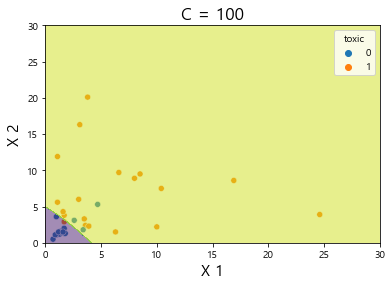

In [51]:
C_list = [10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9,10**10]
C = 100
svm_clf = SVC(kernel='poly',degree=3, C=C, coef0=1)
scaler = StandardScaler()
Xstan1 = scaler.fit_transform(X1)
svm_clf.fit(X1,y1)

def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() -1, x.max() +1
    y_min, y_max = y.min() -1, y.max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
    return xx,yy

# create grids
X10, X11 = X1[:, 0],X1[:, 1]
xx0, xx1 = make_meshgrid(X10,X11)

xgrid = np.c_[xx0.ravel(), xx1.ravel()]

Z = svm_clf.predict(xgrid)
Z = Z.reshape(xx0.shape)

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.contourf(xx0,xx1,Z,alpha=0.5)
plt.xlabel('X 1', fontsize=15)
plt.ylabel('X 2', fontsize=15)
plt.ylim(0,30)
plt.xlim(0,30)
plt.title(f'C = {C}',fontsize = 17)
plt.show()

In [66]:
cv_scores_1 = []
Xstan1 = scaler.fit_transform(X1)

for C in C_list:
    clf = SVC(kernel='poly',degree=3, C=C, coef0=1)

    skfold = StratifiedKFold(n_splits=3)
    cv1_bacc = []
    cv1_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan1, y1):
        X1_train, X1_test = Xstan1[train_index], Xstan1[test_index]
        y1_train, y1_test = y1[train_index], y1[test_index]

        #학습 및 예측 
        clf.fit(X1_train , y1_train)    
        pred = clf.predict(X1_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
        cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
    cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),2*np.mean(cv1_bacc)-np.mean(cv1_recall)])

cv_scores_1

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.625, 0.9166666666666666, 0.33333333333333337],
 [0.7440476190476191, 0.6785714285714285, 0.8095238095238096],
 [0.7341269841269842, 0.5714285714285715, 0.8968253968253969],
 [0.8015873015873017, 0.7619047619047619, 0.8412698412698416],
 [0.7807539682539684, 0.7202380952380952, 0.8412698412698415],
 [0.8045634920634921, 0.7678571428571429, 0.8412698412698413],
 [0.8214285714285715, 0.8571428571428572, 0.7857142857142858],
 [0.7936507936507936, 0.8571428571428572, 0.73015873015873],
 [0.7589285714285715, 0.7321428571428572, 0.7857142857142858],
 [0.7589285714285715, 0.7321428571428572, 0.7857142857142858],
 [0.7519841269841271, 0.7738095238095238, 0.7301587301587303],
 [0.7519841269841271, 0.7738095238095238, 0.7301587301587303],
 [0.7519841269841271, 0.7738095238095238, 0.7301587301587303]]

In [67]:
cv_scores_2 = []
Xstan2 = scaler.fit_transform(X2)

for C in C_list:
    clf = SVC(kernel='poly',degree=3, C=C, coef0=1)
    
    skfold = StratifiedKFold(n_splits=3)
    cv2_bacc = []
    cv2_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan2, y2):
        X2_train, X2_test = Xstan2[train_index], Xstan2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]

        #학습 및 예측 
        clf.fit(X2_train , y2_train)    
        pred = clf.predict(X2_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv2_bacc.append(balanced_accuracy_score(y_true =y2_test, y_pred=pred))
        cv2_recall.append(recall_score(y_true=y2_test, y_pred=pred))
    cv_scores_2.append([np.mean(cv2_bacc),np.mean(cv2_recall),2*np.mean(cv2_bacc)-np.mean(cv2_recall)])

cv_scores_2

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5684523809523809, 0.4702380952380952, 0.6666666666666667],
 [0.513888888888889, 0.4166666666666667, 0.6111111111111112],
 [0.5982142857142857, 0.3630952380952381, 0.8333333333333333],
 [0.6696428571428571, 0.505952380952381, 0.8333333333333331],
 [0.7380952380952381, 0.6428571428571429, 0.8333333333333334],
 [0.6557539682539683, 0.5892857142857143, 0.7222222222222222],
 [0.6825396825396824, 0.6428571428571428, 0.7222222222222221],
 [0.6111111111111112, 0.5, 0.7222222222222223],
 [0.6448412698412699, 0.5119047619047619, 0.7777777777777779],
 [0.6071428571428571, 0.5476190476190476, 0.6666666666666666],
 [0.5793650793650794, 0.5952380952380952, 0.5634920634920636],
 [0.5069444444444444, 0.6011904761904763, 0.41269841269841256],
 [0.48313492063492064, 0.6011904761904763, 0.365079365079365]]

In [68]:
cv_scores_3 = []
Xstan3 = scaler.fit_transform(X3)

for C in C_list:
    clf = SVC(kernel='poly',degree=3, C=C, coef0=1)
    
    skfold = StratifiedKFold(n_splits=3)
    cv3_bacc = []
    cv3_recall = []
    cv3_precision = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan3, y3):
        X3_train, X3_test = Xstan3[train_index], Xstan3[test_index]
        y3_train, y3_test = y3[train_index], y3[test_index]

        #학습 및 예측 
        clf.fit(X3_train , y3_train)    
        pred = clf.predict(X3_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv3_bacc.append(balanced_accuracy_score(y_true =y3_test, y_pred=pred))
        cv3_recall.append(recall_score(y_true=y3_test, y_pred=pred))
        cv3_precision.append(precision_score(y_true=y3_test, y_pred=pred))
    cv_scores_3.append([np.mean(cv3_bacc),np.mean(cv3_recall),2*np.mean(cv3_bacc)-np.mean(cv3_recall)])

cv_scores_3

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5783730158730159, 0.6011904761904762, 0.5555555555555557],
 [0.7113095238095238, 0.5892857142857143, 0.8333333333333334],
 [0.683531746031746, 0.5892857142857143, 0.7777777777777778],
 [0.7311507936507935, 0.7321428571428572, 0.7301587301587298],
 [0.6557539682539683, 0.6369047619047619, 0.6746031746031746],
 [0.6587301587301587, 0.6428571428571429, 0.6746031746031745],
 [0.7033730158730158, 0.7797619047619048, 0.6269841269841269],
 [0.7797619047619048, 0.8214285714285715, 0.738095238095238],
 [0.8005952380952381, 0.8630952380952381, 0.7380952380952381],
 [0.8005952380952381, 0.8630952380952381, 0.7380952380952381],
 [0.8005952380952381, 0.8630952380952381, 0.7380952380952381],
 [0.8005952380952381, 0.8630952380952381, 0.7380952380952381]]

In [72]:
mean_cv_scores_poly = []

for i in range(14):
    mean_bacc = (cv_scores_1[i][0] + cv_scores_2[i][0] + cv_scores_3[i][0])/3
    mean_recall = (cv_scores_1[i][1] + cv_scores_2[i][1] + cv_scores_3[i][1])/3
    mean_precision = (cv_scores_1[i][2] + cv_scores_2[i][2] + cv_scores_3[i][2])/3
    mean_cv_scores_poly.append([mean_bacc,mean_recall,mean_precision])

mean_cv_scores_poly

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.564484126984127, 0.7956349206349206, 0.3333333333333333],
 [0.6121031746031745, 0.5654761904761904, 0.6587301587301589],
 [0.6812169312169312, 0.5079365079365079, 0.8544973544973545],
 [0.7182539682539684, 0.6190476190476191, 0.8174603174603176],
 [0.75, 0.6984126984126985, 0.8015873015873015],
 [0.7053571428571429, 0.6646825396825397, 0.746031746031746],
 [0.7208994708994708, 0.7142857142857143, 0.7275132275132274],
 [0.7027116402116401, 0.7123015873015873, 0.693121693121693],
 [0.7278439153439153, 0.6884920634920636, 0.7671957671957673],
 [0.7222222222222223, 0.7142857142857143, 0.7301587301587302],
 [0.7106481481481483, 0.7440476190476191, 0.6772486772486773]]

#### Gaussian kernel (RBF kernel)
#### Small gamma

In [84]:
C = 100
gamma = 100
scaler = StandardScaler()

svm_clf = SVC(kernel='rbf',gamma=gamma, C=C,)
svm_clf.fit(Xstan1,y1)

# create grids
X10, X11 = Xstan1[:, 0],Xstan1[:, 1]
xx0, xx1 = make_meshgrid(X10,X11)

xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.contourf(xx0,xx1,Z,alpha=0.5)
plt.xlabel('X 1', fontsize=15)
plt.ylabel('X 2', fontsize=15)
plt.ylim(-5,30)
plt.xlim(-5,30)
plt.title(f'C = {C} and $\gamma = {gamma}$',fontsize = 17)
plt.show()
print(f"balnced accuracy score = {balanced_accuracy_score(y_true =y1_test, y_pred=pred)}")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [73]:
cv_scores_1 = []
Xstan1 = scaler.fit_transform(X1)

for C in C_list:
    clf = SVC(kernel='rbf', C=C, gamma = 10**2)
    
    skfold = StratifiedKFold(n_splits=3)
    cv1_bacc = []
    cv1_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan1, y1):
        X1_train, X1_test = Xstan1[train_index], Xstan1[test_index]
        y1_train, y1_test = y1[train_index], y1[test_index]

        #학습 및 예측 
        clf.fit(X1_train , y1_train)    
        pred = clf.predict(X1_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
        cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
    cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),2*np.mean(cv1_bacc)-np.mean(cv1_recall)])

cv_scores_1

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.8452380952380952, 0.9047619047619048, 0.7857142857142857],
 [0.8452380952380952, 0.9047619047619048, 0.7857142857142857],
 [0.8452380952380952, 0.9047619047619048, 0.7857142857142857],
 [0.7202380952380952, 0.6547619047619048, 0.7857142857142857],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856],
 [0.6726190476190476, 0.5595238095238095, 0.7857142857142856]]

In [74]:
cv_scores_2 = []

for C in C_list:
    clf = SVC(kernel='rbf',C=C, gamma=10**2)
    
    skfold = StratifiedKFold(n_splits=3)
    cv2_bacc = []
    cv2_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan2, y2):
        X2_train, X2_test = Xstan2[train_index], Xstan2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]

        #학습 및 예측 
        clf.fit(X2_train , y2_train)    
        pred = clf.predict(X2_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv2_bacc.append(balanced_accuracy_score(y_true =y2_test, y_pred=pred))
        cv2_recall.append(recall_score(y_true=y2_test, y_pred=pred))
    cv_scores_2.append([np.mean(cv2_bacc),np.mean(cv2_recall),2*np.mean(cv2_bacc)-np.mean(cv2_recall)])

cv_scores_2

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.7827380952380952, 0.7321428571428572, 0.8333333333333333],
 [0.7311507936507936, 0.6845238095238096, 0.7777777777777776],
 [0.6557539682539683, 0.6845238095238096, 0.6269841269841269],
 [0.6557539682539683, 0.7797619047619048, 0.5317460317460317],
 [0.5813492063492064, 0.5833333333333334, 0.5793650793650794],
 [0.7003968253968255, 0.8214285714285715, 0.5793650793650794],
 [0.6051587301587301, 0.6309523809523809, 0.5793650793650793],
 [0.5773809523809523, 0.6309523809523809, 0.5238095238095237],
 [0.5773809523809523, 0.6309523809523809, 0.5238095238095237],
 [0.5773809523809523, 0.6309523809523809, 0.5238095238095237],
 [0.5773809523809523, 0.6309523809523809, 0.5238095238095237]]

In [75]:
cv_scores_3 = []

for C in C_list:
    clf = SVC(kernel='rbf', C=C, gamma=10**2)
    
    skfold = StratifiedKFold(n_splits=3)
    cv3_bacc = []
    cv3_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan3, y3):
        X3_train, X3_test = Xstan3[train_index], Xstan3[test_index]
        y3_train, y3_test = y3[train_index], y3[test_index]

        #학습 및 예측 
        clf.fit(X3_train , y3_train)    
        pred = clf.predict(X3_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv3_bacc.append(balanced_accuracy_score(y_true =y3_test, y_pred=pred))
        cv3_recall.append(recall_score(y_true=y3_test, y_pred=pred))
    cv_scores_3.append([np.mean(cv3_bacc),np.mean(cv3_recall),2*np.mean(cv3_bacc)-np.mean(cv3_recall)])

cv_scores_3

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.7242063492063492, 0.8214285714285715, 0.6269841269841269],
 [0.7658730158730158, 0.9047619047619048, 0.6269841269841269],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745]]

In [76]:
mean_cv_scores_rbf_C = []

for i in range(14):
    mean_bacc = (cv_scores_1[i][0] + cv_scores_2[i][0] + cv_scores_3[i][0])/3
    mean_recall = (cv_scores_1[i][1] + cv_scores_2[i][1] + cv_scores_3[i][1])/3
    mean_precision = (cv_scores_1[i][2] + cv_scores_2[i][2] + cv_scores_3[i][2])/3
    mean_cv_scores_rbf_C.append([mean_bacc,mean_recall,mean_precision])

mean_cv_scores_rbf_C

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.7840608465608465, 0.8194444444444445, 0.7486772486772487],
 [0.7807539682539683, 0.8313492063492064, 0.7301587301587301],
 [0.763558201058201, 0.8313492063492064, 0.6957671957671957],
 [0.7218915343915344, 0.7797619047619048, 0.6640211640211641],
 [0.6812169312169312, 0.6825396825396824, 0.6798941798941799],
 [0.7208994708994708, 0.7619047619047619, 0.6798941798941799],
 [0.6891534391534391, 0.6984126984126985, 0.6798941798941799],
 [0.6798941798941799, 0.6984126984126985, 0.6613756613756613],
 [0.6798941798941799, 0.6984126984126985, 0.6613756613756613]]

In [77]:
cv_scores_1 = []
gamma_list = [10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9,10**10]

for gamma in gamma_list:
    clf = SVC(kernel='rbf', C=10**2, gamma = gamma)
    
    skfold = StratifiedKFold(n_splits=3)
    cv1_bacc = []
    cv1_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan1, y1):
        X1_train, X1_test = Xstan1[train_index], Xstan1[test_index]
        y1_train, y1_test = y1[train_index], y1[test_index]

        #학습 및 예측 
        clf.fit(X1_train , y1_train)    
        pred = clf.predict(X1_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
        cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
    cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),2*np.mean(cv1_bacc)-np.mean(cv1_recall)])

cv_scores_1

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.6994047619047619, 0.44642857142857145, 0.9523809523809523],
 [0.7202380952380952, 0.48809523809523814, 0.9523809523809523],
 [0.7390873015873017, 0.636904761904762, 0.8412698412698415],
 [0.7807539682539684, 0.7202380952380952, 0.8412698412698415],
 [0.8214285714285715, 0.8571428571428572, 0.7857142857142858],
 [0.8452380952380952, 0.9047619047619048, 0.7857142857142857],
 [0.8134920634920634, 0.9523809523809524, 0.6746031746031743],
 [0.7301587301587302, 0.9523809523809524, 0.507936507936508],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0]]

In [78]:
cv_scores_2 = []

for gamma in gamma_list:
    clf = SVC(kernel='rbf',C=10**2, gamma=gamma)
    
    skfold = StratifiedKFold(n_splits=3)
    cv2_bacc = []
    cv2_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan2, y2):
        X2_train, X2_test = Xstan2[train_index], Xstan2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]

        #학습 및 예측 
        clf.fit(X2_train , y2_train)    
        pred = clf.predict(X2_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv2_bacc.append(balanced_accuracy_score(y_true =y2_test, y_pred=pred))
        cv2_recall.append(recall_score(y_true=y2_test, y_pred=pred))
    cv_scores_2.append([np.mean(cv2_bacc),np.mean(cv2_recall),2*np.mean(cv2_bacc)-np.mean(cv2_recall)])

cv_scores_2

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5376984126984127, 0.46428571428571425, 0.6111111111111112],
 [0.5982142857142857, 0.3630952380952381, 0.8333333333333333],
 [0.6666666666666666, 0.5, 0.8333333333333333],
 [0.6904761904761904, 0.5476190476190476, 0.8333333333333331],
 [0.7073412698412698, 0.6369047619047619, 0.7777777777777777],
 [0.6557539682539683, 0.6845238095238096, 0.6269841269841269],
 [0.6041666666666666, 0.7797619047619048, 0.4285714285714285],
 [0.5694444444444444, 0.8214285714285715, 0.31746031746031733],
 [0.5515873015873015, 1.0, 0.10317460317460303],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0]]

In [79]:
cv_scores_3 = []

for gamma in gamma_list:
    clf = SVC(kernel='rbf', C=10**2, gamma=gamma)
    
    skfold = StratifiedKFold(n_splits=3)
    cv3_bacc = []
    cv3_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(Xstan3, y3):
        X3_train, X3_test = Xstan3[train_index], Xstan3[test_index]
        y3_train, y3_test = y3[train_index], y3[test_index]

        #학습 및 예측 
        clf.fit(X3_train , y3_train)    
        pred = clf.predict(X3_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv3_bacc.append(balanced_accuracy_score(y_true =y3_test, y_pred=pred))
        cv3_recall.append(recall_score(y_true=y3_test, y_pred=pred))
    cv_scores_3.append([np.mean(cv3_bacc),np.mean(cv3_recall),2*np.mean(cv3_bacc)-np.mean(cv3_recall)])

cv_scores_3

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5753968253968255, 0.5952380952380952, 0.5555555555555557],
 [0.7182539682539684, 0.5476190476190477, 0.8888888888888891],
 [0.683531746031746, 0.5892857142857143, 0.7777777777777778],
 [0.6656746031746031, 0.6011904761904763, 0.73015873015873],
 [0.6626984126984127, 0.6428571428571429, 0.6825396825396824],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.7301587301587302, 1.0, 0.46031746031746046],
 [0.5515873015873015, 1.0, 0.10317460317460303],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0]]

In [80]:
mean_cv_scores_rbf_gamma = []

for i in range(14):
    mean_bacc = (cv_scores_1[i][0] + cv_scores_2[i][0] + cv_scores_3[i][0])/3
    mean_recall = (cv_scores_1[i][1] + cv_scores_2[i][1] + cv_scores_3[i][1])/3
    mean_precision = (cv_scores_1[i][2] + cv_scores_2[i][2] + cv_scores_3[i][2])/3
    mean_cv_scores_rbf_gamma.append([mean_bacc,mean_recall,mean_precision])

mean_cv_scores_rbf_gamma

[[0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.6041666666666666, 0.501984126984127, 0.7063492063492064],
 [0.6789021164021164, 0.46626984126984133, 0.8915343915343916],
 [0.6964285714285715, 0.5753968253968255, 0.8174603174603176],
 [0.7123015873015873, 0.623015873015873, 0.8015873015873015],
 [0.730489417989418, 0.7123015873015873, 0.7486772486772487],
 [0.763558201058201, 0.8313492063492064, 0.6957671957671957],
 [0.7357804232804233, 0.878968253968254, 0.5925925925925924],
 [0.6765873015873017, 0.9246031746031745, 0.4285714285714286],
 [0.5343915343915343, 1.0, 0.06878306878306868],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0],
 [0.5, 1.0, 0.0]]

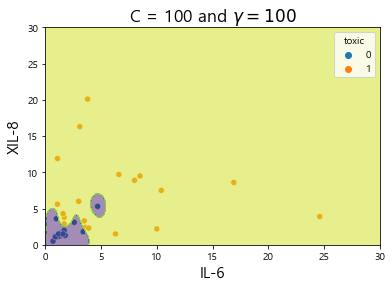

In [86]:
C = 100
gamma = 100
scaler = StandardScaler()
Xstan = scaler.fit_transform(X1)
svm_clf = SVC(kernel='rbf',gamma=gamma, C=C,)
svm_clf.fit(Xstan,y1)

# create grids
X10, X11 = X1[:, 0],X1[:, 1]
xx0, xx1 = make_meshgrid(X10,X11)

xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.contourf(xx0,xx1,Z,alpha=0.5)
plt.xlabel('IL-6', fontsize=15)
plt.ylabel('IL-8', fontsize=15)
plt.ylim(0,30)
plt.xlim(0,30)
plt.title(f'C = {C} and $\gamma = {gamma}$',fontsize = 17)
plt.show()

#### Sigmoid kernel

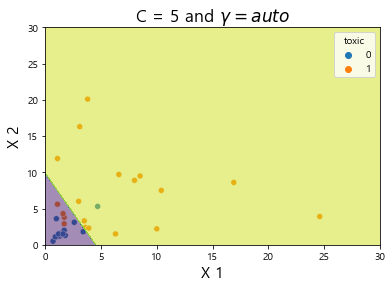

In [83]:
C = 5
gamma = 'auto'
scaler = StandardScaler()
Xstan = scaler.fit_transform(X1)
svm_clf = SVC(kernel='sigmoid',gamma=gamma, C=C,)
svm_clf.fit(Xstan,y1)

# create grids
X10, X11 = X1[:, 0],X1[:, 1]
xx0, xx1 = make_meshgrid(X10,X11)

xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')
plt.contourf(xx0,xx1,Z,alpha=0.5)
plt.xlabel('X 1', fontsize=15)
plt.ylabel('X 2', fontsize=15)
plt.ylim(0,30)
plt.xlim(0,30)
plt.title(f'C = {C} and $\gamma = {gamma}$',fontsize = 17)
plt.show()